# Data Science Essentials: GeoPandas
    <Name>
    <Class>
    <Date>

In [1]:
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib

print(matplotlib.__version__)
print(pd.__version__)

3.7.2
1.5.3


## Problem 1

Read in the file *airports.csv* as a pandas DataFrame.
Create three convex hulls around the three sets of airports listed below.
This can be done by passing in lists of the airports' coordinates (Longitude and Latitude zipped together) to a *shapely.geometry.Polygon* object.

Then, create a new GeoDataFrame using a dictionary with key *'geometry'* and with a list of these three Polygons as the value.
Plot this GeoDataFrame, and then plot the outlined world map on top of it.

1. Maio Airport, Scatsta Airport, Stokmarknes Skagen Airport, Bekily Airport, K. D. Matanzima Airport, RAF Ascension Island
2. Oiapoque Airport, Maio Airport, Zhezkazgan Airport, Walton Airport, RAF Ascension Island, Usiminas Airport, Piloto Osvaldo Marques Dias Airport
3. Zhezkazgan Airport, Khanty Mansiysk Airport, Novy Urengoy Airport, Kalay Airport, Biju Patnaik Airport, Walton Airport

/var/folders/td/8px6smg12fxf4nw_rf4snx840000gn/T/ipykernel_22812/11813046.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


POLYGON ((-23.213699340820312 15.15590000152588, -1.2961100339889526 60.43280029296875, 15.033416748047 68.578826904297, 45.3045272827 -24.235694754699995, 28.6733551025 -31.5463631849, -14.393699645996094 -7.969600200653076, -23.213699340820312 15.15590000152588))


Text(0.5, 1.0, 'Problem 1')

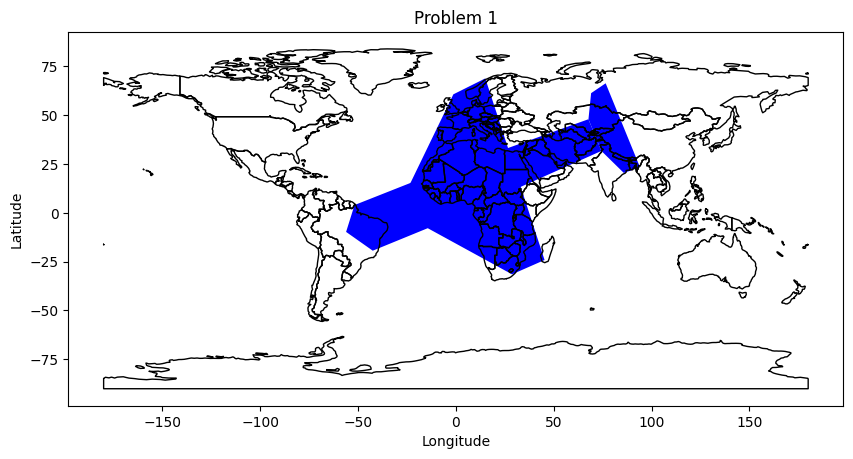

In [2]:
# Initialize sets
first_set = ['Maio Airport', 'Scatsta Airport', 'Stokmarknes Skagen Airport',
                 'Bekily Airport','K. D. Matanzima Airport', 'RAF Ascension Island']
second_set = ['Oiapoque Airport','Maio Airport', 'Zhezkazgan Airport',
                'Walton Airport','RAF Ascension Island','Usiminas Airport',
                 'Piloto Osvaldo Marques Dias Airport']
third_set = ['Zhezkazgan Airport','Khanty Mansiysk Airport','Novy Urengoy Airport',
                 'Kalay Airport','Biju Patnaik Airport','Walton Airport']


# Read in world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Read in airport data
airport_data = pd.read_csv('airports.csv')

# Initialize sets
first_lat_long = []
second_lat_long = []
third_lat_long = []

# Get latitudes and longitudes in first set
for airport in first_set:
    indx = airport_data.loc[airport_data['Name'] == airport].index[0]
    lat = airport_data.loc[indx, 'Latitude']
    long = airport_data.loc[indx, 'Longitude']
    first_lat_long.append((long, lat))
    
# Get latitudes and longitudes in second set
for airport in second_set:
    indx = airport_data.loc[airport_data['Name'] == airport].index[0]
    lat = airport_data.loc[indx, 'Latitude']
    long = airport_data.loc[indx, 'Longitude']
    second_lat_long.append((long, lat))
  
# Get latitudes and longitudes in third set  
for airport in third_set:
    indx = airport_data.loc[airport_data['Name'] == airport].index[0]
    lat = airport_data.loc[indx, 'Latitude']
    long = airport_data.loc[indx, 'Longitude']
    third_lat_long.append((long, lat))
    
# Create convex hulls
first_convex_hull = Polygon(first_lat_long)
second_convex_hull = Polygon(second_lat_long)
third_convex_hull = Polygon(third_lat_long)

# Make a list of data of convex hulls
data = [{
    'Set': 'First Set', 'Convex_Hull': first_convex_hull},
    {'Set': 'Second Set', 'Convex_Hull': second_convex_hull},
    {'Set': 'Third Set', 'Convex_Hull': third_convex_hull}
]

# Plot data
gdf = gpd.GeoDataFrame(data, geometry = 'Convex_Hull')
fig, ax = plt.subplots(figsize = (10,7), ncols = 1, nrows = 1)
base = world.boundary.plot(edgecolor = 'black', ax = ax, linewidth = 1)
gdf.plot(ax = base, marker = 'o', color = 'blue', markersize = 1)
ax.set_xlabel('Longitude')
ax.set_ylabel("Latitude")
ax.set_title('Problem 1')


## Problem 2

Use the command *geopandas.read_file('county_data.gpkg')* to create a GeoDataFrame of information about US counties.
Each county's shape is stored in the *geometry* column.
Use this to **plot the boundaries of all US counties two times**, first using the default CRS and then using EPSG:5071.

Next, create a new GeoDataFrame that combines (*dissolve*) all counties within each state (*by='STATEFP'*).
Drop regions with the following STATEFP codes: 02, 15, 60, 66, 69, 72, 78.
Plot the boundary of this GeoDataFrame to see an outline of the 48 contiguous states.
Ensure a CRS of 5071.

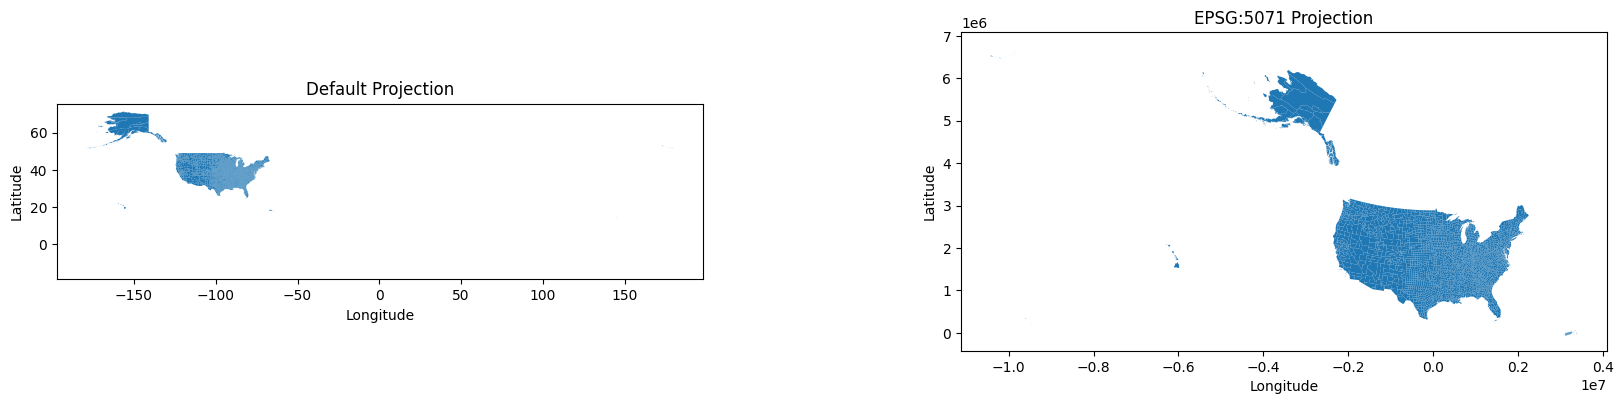

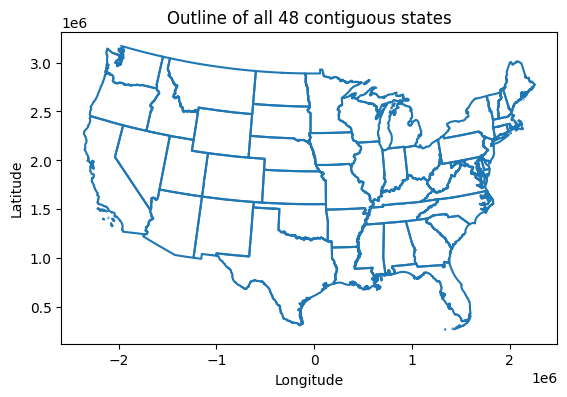

In [3]:
# Load the county data
county_data = gpd.read_file('county_data.gpkg')

# Plot the county data using the default CRS
fig, ax = plt.subplots(1,2, figsize = (20,20)) # get best fit figure
county_data.plot(ax = ax[0])
ax[0].set_title("Default Projection")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")

# Make there be a space in between the plots so that the words don't overlap
plt.subplots_adjust(wspace = 0.4)

# Plot the county data using the EPSG:5071
county_data.to_crs(5071, inplace = True)
county_data.plot(ax = ax[1])
ax[1].set_title("EPSG:5071 Projection")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")

# Show plot
plt.show()

# Drop regions with these STATEFP codes
exclusions = ['02', '15', '60', '66', '69', '72', '78']
needed_counties = county_data[~county_data["STATEFP"].isin(exclusions)]


# Combine counties into states
counties_by_state = needed_counties.dissolve(by = 'STATEFP')
counties_by_state.to_crs(5071, inplace = True)

# Plot the 48 contiguous states
fig, ax = plt.subplots(1)
counties_by_state.boundary.plot(ax = ax)
ax.set_title("Outline of all 48 contiguous states")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()



## Problem 3

Load in the file *nytimes.csv* as a Pandas DataFrame.
This file includes county-level data for the cumulative cases and deaths of Covid-19 in the US, starting with the first case in Snohomish County, Washington, on January 21, 2020.

Merge the county GeoDataFrame from *county_data.gpkg* with the *nytimes* DataFrame on the county *fips* codes (a FIPS code is a 5-digit unique identifier for geographic locations).
Note that the *fips* column of the *nytimes* DataFrame stores entries as floats, but the county GeoDataFrame stores FIPS codes as strings, with the first two digits in the *STATEFP* column and the last three digits in the *COUNTYFP* column.
Thus, you will need to add these two columns together and then convert them into floats so they can be merged with the *fips* column in the *nytimes* DataFrame.

Drop the regions from the county GeoDataFrame with the same STATEFP codes as in Problem 2. Also, make sure to change the CRS of the county GeoDataFrame to EPSG:5071 *before* you merge the two DataFrames (this will make the code run much faster).

**Plot the cases from March 21, 2020, and then plot your state outline map from Problem 2 on top of that (with a CRS of EPSG:5071). 
Include a colorbar using the arguments *legend=True* and *cmap='PuBu_r'* in the *plot* function.
Finally, print out the name of the county with the most cases on March 21, 2020, along with its case count.**

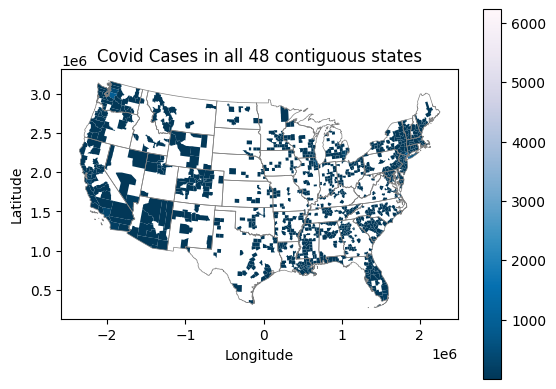

County with most cases is New York City with a case count of 6226


In [4]:
# Read in nytimes.csv
ny_times_df = pd.read_csv('nytimes.csv')

# Convert to datetime
ny_times_df['date'] = pd.to_datetime(ny_times_df['date'])

# Exclude Alaska and Hawaii
state_exclusions = ['Alaska', 'Hawaii']
ny_times_df = ny_times_df[~ny_times_df["state"].isin(state_exclusions)]

# Make the fips column
county_data['fips'] = (county_data['STATEFP'].astype(str) + county_data['COUNTYFP'].astype(str)).astype(int)

# Merge NYT data with county data
merged_all = gpd.GeoDataFrame(ny_times_df.merge(county_data, on = 'fips'))

# Pull out only the cases on March 21, 2020
merged = merged_all[merged_all['date'] == '2020-03-21']

# Make a GeoDataFrame of this data
merged = gpd.GeoDataFrame(merged[['cases', 'geometry']], geometry = 'geometry')

# Plot the data with a color map
fig, ax = plt.subplots(1)
base = counties_by_state.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = 'gray')
merged.plot(ax = base, column = 'cases', legend = True, cmap = 'PuBu_r')
ax.set_title("Covid Cases in all 48 contiguous states")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Find county with the most cases on March 21, 2020 along with its case count
max_case_count = max(merged['cases'])
county_with_max_cases = ny_times_df[ny_times_df['cases'] == max_case_count]
case = county_with_max_cases[county_with_max_cases['state'] == 'New York']

# Find the county associated with this max_case_count
print('County with most cases is New York City with a case count of', max_case_count)

## Problem 4

As in Problem 3, plot your state outline map from Problem 2 on top of a map of Covid-19 cases from March 21, 2020 (each with a CRS of EPSG:5071).
This time, however, use a log scale.
Pick a good colormap (the counties with the most cases should generally be darkest) and be sure to display a colorbar.

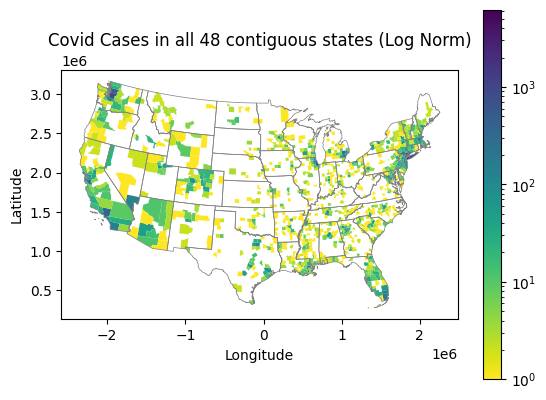

In [5]:
# Set up figure and norm
fig, ax = plt.subplots(1)
norm = LogNorm(vmin = min(merged['cases']), vmax = max(merged['cases']))

# Plot data
base = counties_by_state.boundary.plot(ax = ax, linewidth = 0.5, edgecolor = 'gray')
merged.plot(ax = base, column = 'cases', legend = True, cmap = 'viridis_r', norm = norm)
ax.set_title("Covid Cases in all 48 contiguous states (Log Norm)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()





## Problem 5

In this problem, you will create an animation of the spread of Covid-19 through US counties from January 21, 2020, through June 21, 2020.
You will use the same GeoDataFrame you used in Problems 3 and 4 (with a CRS of EPSG:5071).
Use a log scale and a good colormap, and be sure that you're using the same norm and colorbar for the whole animation.

As a reminder, below is a summary of what you will need in order to animate this map.
You may also find it helpful to refer to the animation section included with the Volume 4 lab manual. 

- Set up your figure and norm. Be sure to use the highest case count for your *vmax* so that the scale remains uniform.
- Write your *update* function. This should plot the cases from a given day as well as the state boundaries.
- Set up your colorbar. Do this outside the *update* function to avoid adding a new colorbar each day.
- Create a *FuncAnimation* object. Check to make sure everything displays properly before you save it.
- Save the animation to a file, and embed it into the notebook.

In [20]:
plt.ioff()

# Set up the figure and the norm. Be sure to use the highest case count for your vmax so that the scale remains uniform
fig, ax = plt.subplots(1, figsize=(10,7))
norm = LogNorm(vmin = 1, vmax = max(merged_all.cases))

# Define the update function
def update(date):
    eligible = merged_all[merged_all['date'] == date]
    ax.clear()
    eligible.plot(column = 'cases', ax = ax, cmap = 'plasma_r', norm = norm)
    counties_by_state.boundary.plot(ax = ax, color = 'gray')
    ax.set_title("Covid Cases in all 48 contiguous states")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")


# Create colorbar
sm = ScalarMappable(norm=norm, cmap='plasma_r')
cbar = fig.colorbar(sm, ax=ax, label='Number of Cases')

# Create animation object
ani = animation.FuncAnimation(fig, update, 
        frames= sorted(set(merged_all['date'])),
        interval=1000*(1/30)) # Each frame is 1/30 of a second

plt.close(fig)

# Save file
animation.writer = animation.writers['ffmpeg']
ani.save('covid_spread.mp4')



In [22]:
# Embed file
<video src="covid_spread.mp4" controls>

SyntaxError: invalid syntax (1927261032.py, line 1)

<video src="covid_spread.mp4" controls>